정주호 (Ju Ho Jung) 2021-01-27

1. 강의 : Angrew Ng 교수의 코세라 강의 https://www.coursera.org/learn/machine-learning/

2. Cousera Machine learning(Andrew Ng)의 강의 내용 정리 및 assignment

3. 모든 자료(도표, 수식, 텍스트)는 해당 강의의 강의 내용 및 과제에서 가져왔음을 알린다.

4. 모든 assignment는 Octave/MATLAB function으로 진행한다.

**1. Logistic regression**

연습문제에서, 학생들의 대학입학 승인을 예측하기 위한 logistic regression model 를 구축한다.

각각의 training example에 대해서, 2개 시험의 응시자의 점수와 승인 결정이 포함되어 있다.

-2가지 시험점수와 승인결과를 가진 training example을 가지고 응시자의 합격 확률을 측정하는 분류 모델을 구축하는 것이 목표이다.

**1.1 Visualizing the data**



In [38]:
import numpy as np
import matplotlib.pyplot as plt



In [39]:
data = np.loadtxt('/content/ex2data1.txt',delimiter=',')
data = np.array(data) #data를 numpy로 배열만들기
X = data[:,0:2] #전체행을 읽되, feature은 1,2번
y = data[:,2] #에측값은 마지막 0,1로 표현된 합불

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.



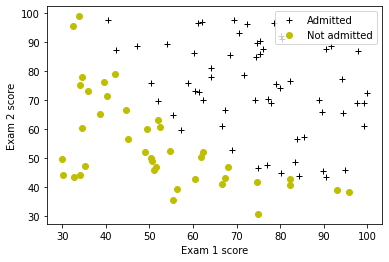

In [40]:
## ==================== Part 1: Plotting ====================
# 우리는 데이터를 plotting하면서 연습문제를 시작하는데, 우리가 작업하는
# 문제를 이해하기 위해서이다.

def plotData(X, y):
    """
    데이터 포인트 x와 y를 새로운 figure에 plot한다.
    긍정 examples는 +로, 부정 examples는 o로 표시한다.
    X는 Mx2 행렬이라고 가정한다.
    """
    
    # ====================== YOUR CODE HERE ======================
    # 지시사항: 긍정과 부정 examples를 2D plot상에 표시하는데, 옵션 
    # 'k+'는 긍정 examples에 그리고 'ko' 는 부정 examples에 사용한다.
    
    # 긍정과 부정 examples의 인덱스를 찾는다.
    # *******************************************************************
    # XXX: 인덱스를 찾을 경우, find() 또는 nonzero()를 사용한다.
    # 이렇게 사용하지 말자: pos = (y == 1), neg = (y == 0)
    # *******************************************************************    
    pos = (y==1)  #합격
    neg = (y == 0)  #불합격

    # examples를 plot한다.
    plt.plot(X[pos, 0], X[pos, 1], 'k+')
    plt.plot(X[neg, 0], X[neg, 1], 'ko', color='y', label='Not admitted')
    

print('Plotting data with + indicating (y = 1) examples and o \
indicating (y = 0) examples.\n')

plotData(X, y)

# 몇몇 라벨을 표시한다.
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

# plot 순서로 표시한다.
plt.legend(('Admitted', 'Not admitted'), loc='upper right')

**1.2 Implementation**

1.2.1 Warm exercise: sigmoid function
실제 cost function을 가지고 시작하기 전에, logistic regression 의 hypothesis 가설이 다음처럼 정의됨을 기억하라:

$ h_{\theta}(x) = g(\theta^{T}x) $,

여기서 함수 g는 sigmoid 함수이다. sigmoid 함수는 다음처럼 정의된다:

$ g(z) = \frac{1}{1+e^{-z}} $.


-아주 큰 x의 양의 값에 대해서, sigmoid 는 1에 가까워야 하고, 반면에 아주 큰 음의 값에 대해서, sigmoid 는 0에 가까워야 한다. simoid(0)을 평가하면 정확히 0.5의 값을 주어야 한다.

In [41]:
## ============ Part 2: Compute Cost and Gradient ============
# 연습문제의 이 부분에서, logistic regression에 대한 cost와 gradient
# 를 구현할 것이다. costFunction.m 내의 코드를 완성할 필요가 있다.

def sigmoid(z):
    """
    큰 양의 값에 대해서는 결과값이 1에 가깝고, 
    큰 음수의 값에 대해서는 0에 가깝다.
    simoid(0) = 0.5
    """
    g = 1 / (1  + np.exp(-z))
    
    return g

print('sigmoid(10) = %s, sigmoid(-10) = %s, sigmoid(0) = %s' 
      % (sigmoid(10), sigmoid(-10), sigmoid(0)))

sigmoid(10) = 0.9999546021312976, sigmoid(-10) = 4.5397868702434395e-05, sigmoid(0) = 0.5


1.2.2 Cost function and gradient

In [42]:
# You should now submit your solutions.

# 데이터 행렬을 적절히 설정한다. 그리고 절편 항목을 위해서 1을 추가한다.
# data array의 크기를 조회한다.
m, n = np.shape(X)

# 절편 항목을 X와 X_test에 추가한다.
X_1 = np.hstack((np.ones((m, 1)), X))
#X_1 = np.column_stack((np.ones(m), X))

# 파라미터를 초기화한다. 절편이 추가되니까 n + 1을 해준다.
initial_theta = np.zeros(n+1)

In [43]:
def costFunction(theta, X, y):
    """
    logistic regression에 대한 cost와 graident를 계산한다.
    cost를 계산하는데 logistic regression에 대한 파라미터로 theta를
    사용한다. 그리고 cost에 대한 gradient를 계산한다.
    """
    
    # 몇몇 유용한 변수를 초기화 한다.
    m, n = X.shape # m은 training examples 수이다.
    
    # 다음 변수를 올바르게 반환해야 한다.
    J = 0
    grad = np.zeros(np.size(theta))
    
    # ====================== YOUR CODE HERE ======================
    # 지시사항: 특정 theta에 대한 cost를 계산한다.
    # J를 cost로 설정한다.
    # 편미분을 계산하고 cost에 대한 편미분을 grad에 설정한다.
    
    # Note: grad는 theta와 동일한 차원이다.
    
    """
    XXX: 1) array 에서 * 는 요소곱을 나타낸다. 행렬곱은 .dot() 함수를 사용한다.
        2) matrix에서 * 는 행렬곱을 나타낸다. 요소곱은 .multiply() 함수를 사용한다.
        3) 함수 안에서는 matrix 연산으로 통일한다.
    """
    
    prediction = sigmoid(X.dot(theta))
    
    # cost J를 구한다.
    J = 1/m * sum(-y * np.log(prediction) - (1 - y) * np.log(1 - prediction))
    
    # gradient를 구한다.
    error = prediction - y

    delta = 1/m * error.T.dot(X)
    grad = delta
    
    return J, grad

In [44]:
# 초기 cost와 gradient를 계산하고 표시한다.
cost, grad = costFunction(initial_theta, X_1, y)

print('Cost at initial theta (zeros): %f ' % cost)
print('Gradient at initial theta (zeros): ')
print('%s' % grad)
"""
In Octave/MATLAB: 

Cost at initial theta (zeros): 0.693147
Gradient at initial theta (zeros): 
 -0.100000 
 -12.009217 
 -11.262842 
"""
print()

Cost at initial theta (zeros): 0.693147 
Gradient at initial theta (zeros): 
[ -0.1        -12.00921659 -11.26284221]



**1.2.4 Evaluating logistic regression**

파라미터의 quality를 평가하기 위한 다른 방법으로 training set 상에서 학습된 모델이 얼마나 잘 예측하는지 보는 것이다.


In [45]:
## ============= Part 3: Optimizing using fminunc  =============
# 이번 연습문제에서, 당신은 내장 함수 (fminunc) 를 사용해서 최적의 
# theta 파라미터를 찾을 것이다.

# minimize 함수 호출을 사용하기 위해 import 한다.
import scipy.optimize as op

# octave 에서는 costFunction 안에서 cost와 gradient를 한꺼번에 계산했다.
# python 에서는 minimize () 사용을 위해서 cost와 gradient 계산을 분리한다.

def myCost(theta, X, y):
    """
    cost J를 계산한다.
    """
    
    m, n = X.shape
    # 아래와 같은 방식으로 사용하지 말자.
    #theta1 = theta.reshape(len(theta), 1, order='F').copy()

    predictions = X.dot(theta)
    sig_term = sigmoid(predictions)
    
    # 원본 수식
    J = 1/m * np.sum(-y * log(sig_term) - (1 - y) * log(1 - sig_term))
    
    return J

def myGradient(theta, X, y):
    """
    gradient를 계산한다.
    """
    m, n = np.shape(X)

    # errors 의 차원을 확인해야 한다. predictions과 동일한 차원인지 확인한다.
    # dim(predictions) = dim(erros) = dim(y) = m x 1
    predictions = sigmoid(X.dot(theta))
    errors = predictions - y
    
    delta = 1/m * errors.T.dot(X) # => 1 x n
    grad = delta

    # ********************************************************************
    # XXX: 함수내에서 gradient 반환은 array 타입으로 반환하는 것이 중요하다.
    # return format: array([ -0.1       , -12.00921659, -11.26284221])
    # ********************************************************************
    return grad


# fminunc를 위해서 옵션을 설정한다.
# options = optimset('GradObj', 'on', 'MaxIter', 400); # Octave Code

costFunc = lambda p: costFunction(p, X_1, y)[0]
gradFunc = lambda p: costFunction(p, X_1, y)[1]

# 최적의 theta를 구하기 위해 fminunc를 실행한다.
# 이 함수는 theta와 cost를 반환한다.

# 방법 1) OK
Result = op.minimize(fun = costFunc, x0 = initial_theta, method = 'TNC', jac = gradFunc)

# 방법 2) OK
#Result = op.minimize(fun = myCost, x0 = initial_theta, args = (X_1, y), method = 'TNC'
#                     , jac = myGradient);

# 방법 3) OK
#Result = op.fmin_tnc(func = myCost, x0 = initial_theta, fprime = myGradient, args = (X_1, y))

cost = Result.fun
theta = Result.x

# Cost at theta found by fminunc: 0.203497701589. 
# theta: [-25.16131861   0.20623159   0.20147149]
print('Cost at theta found by fminunc: %s. \n' % cost)
print('theta: ')
print('theta: %s. \n' % theta)


# XXX: 아래 방식 fmin_bfgs()는 잘못된 결과가 나오는데, 
# 어떤 부분이 잘못되었는지 모르겠다. 추후 검토 필요함
#Result = op.fmin_bfgs(f = myCost, x0 = initial_theta, args = (X_1, y), maxiter = 400, fprime = myGradient)
#print (myCost(Result[0], X_1, y))

Cost at theta found by fminunc: 0.2034977015894742. 

theta: 
theta: [-25.16131873   0.20623159   0.20147149]. 



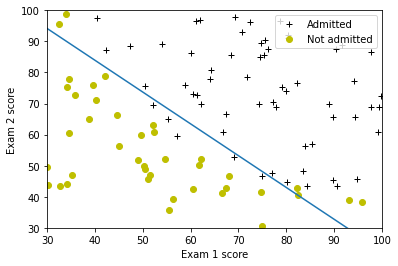

In [46]:
def plotDecisionBoundary(theta, X, y):
    """
    데이터 포인트 x와 y를 theta에 의해 정의된 decision boundary를 가진 새로운
    figure 상으로 plot 한다.
    이 함수는 data points를 plot하는데 positive exampes는 +로, negative exampels는 o로
    표시한다. x는 다음 둘 중 하나로 가정한다.
    1) Mx3 행렬, 첫번째 컬럼은 절편을 위한 1의 벡터로 구성됨
    2) MxN, N > 3 행렬, 첫번째 컬럼은 모두 1로 구성됨
    """
    
    # 데이터를 plot 한다.
    plotData(X[:, 1:3], y)
    
    if np.size(X, 1) <= 3:
        # line을 정의하기 위해서는 단지 2개의 점만 필요하다. 
        # 따라서 2개의 endpoints를 선택한다.
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1] + 2)])
        
        # ***************************************************************
        # XXX: decision boundary line: theta0 + theta1 * x + theta2 * y = 0
        # ***************************************************************
        # decision boundary line을 계산한다.
        plot_y = (-1 / theta[2]) * (theta[1] * plot_x + theta[0])
        
        # plot을 그린다. 그리고 더 좋은 뷰잉을 위해 축을 조정한다.
        plt.plot(plot_x, plot_y)
        
        # Legent, 연습문제를 위해 지정함
        plt.legend(('Admitted', 'Not admitted'), loc='upper right')
        plt.axis([30, 100, 30, 100])
    
    # 변환 작업 중
    else:
        # grid range를 설정한다. linspace는 octave, python 동일한 사용법임
        u = np.linspace(-1, 1.5, 50) # 50,
        v = np.linspace(-1, 1.5, 50)
        
        z = np.zeros((np.size(u), np.size(v)))
        
        # z = theta * x 를 grid 상에서 평가한다.
        for i in np.arange(np.size(u)):
            for j in np.arange(np.size(v)):
                z[i, j] = np.sum(mapFeature(u[i], v[j]) * theta)
                
        z = z.T # contour를 호출하기 전에 transpose하는 것이 중요하다.
        
        # Plot z = 0
        # range를 [0, 0]으로 할 필요가 있다.
        # contour(u, v, z, [0, 0], 'LineWidth', 2); # Octave code
        plt.contour(u, v, z)
     
     
# 경계선을 plot 한다.
plotDecisionBoundary(theta, X_1, y)
# label과 Legend를 표시한다.
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

# plot 순서대로 명시한다.
plt.legend(('Admitted', 'Not admitted'), loc='upper right')

In [47]:
## ============== Part 4: Predict and Accuracies ==============
# 파라미터를 학습한 이후에 여태껏 본적 없는 데이터에 대해서 결과를 예측하기 위해 모델을 사용할 수 있다. 
# 여기에서는, logtistic regression model을 사용해서, 시험 1에 대해서 45점, 시험 2에 대해서 85점을
# 받은 학생이 학교의 승인을 받을 확률을 예측한다.
#
# 더우기, 당신은 우리의 모델에 대해서 training과 test set 의 정확도를 계산할 수 있다.
#
# 당신의 작업은 predict.m 내의 코드를 완성하는 것이다.


# predict 함수는 주어진 데이터와 theta를 이용해서 1 또는 0의 예측값을 만들어낸다.
# 확률이 50% 를 넘으므로, 합격으로 예측한다.
# array 에서 * 는 요소곱이다. 따라서 np.sum 을 이용해 곱의 합을 구한다.


def predict(theta, X):
    """
    학습된 logistic regression 파라미터 theta를 이용해서 label 이 0 또는 1인지를 예측한다.
    이 함수는 0.5에서의 threshold를 이용해서 X에 대한 예측을 계산한다.
    (즉, 만약 sigmoid(theta'*x) >= 0.5, 1로 예측함)
    """
    
    m = X.shape[0] # training exampels의 개수
    
    # 다음 변수를 올바르게 반환해야 한다.
    p = np.zeros(m)
    
    # ====================== YOUR CODE HERE ======================
    # 지시사항: 다음 코드를 완성해서 학습된 logistic regression 파라미터를
    # 이용한 예측을 해보아라.
    # p는 0또는 1의 벡터로 설정되어야 한다.
    
    p = sigmoid(X.dot(theta)) >= 0.5;
    
    return p
    
"""
In Octave/MATLAB: 

theta =

  -25.16127
    0.20623
    0.20147
"""
# exam 1의 점수 45점과 exam 2의 점수 85점을 받은 학생에 대해서 예측한다.
prob = sigmoid(np.sum(np.array([1, 45, 85]) * theta))

print('For a student with scores 45 and 85, we predict an admission probability of %f' % prob)


# training set 에 대한 정확도(accuracy)를 계산한다.
# Train Accuracy: 89.000000
p = predict(theta, X_1)

print('Train Accuracy: %f' % (np.mean(np.double(p == y)) * 100))

"""
In Octave/MATLAB: 

For a student with scores 45 and 85, we predict an admission probability of 0.776289

Train Accuracy: 89.000000
"""
print()


For a student with scores 45 and 85, we predict an admission probability of 0.776291
Train Accuracy: 89.000000



**2. Regularized logistic regression**

2.1 Visualizing the data


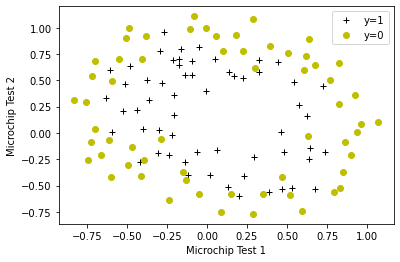

In [48]:
## Machine Learning Online Class - Exercise 2: Logistic Regression

import numpy as np
import matplotlib.pyplot as plt

# 데이터를 로드한다.
# 처음 2개의 컬럼은 X 값을 포함하고 세번째 컬럼은 label (y)를 포함한다.

data = np.loadtxt('ex2data2.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2]

plotData(X, y)

# 라벨과 legend 설정
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

# plot 순서로 지정한다.
plt.legend(('y=1', 'y=0'), loc='upper right')

**2.2 Feature mapping**

data를 더 잘 맞게(fit) 하는 방법은 각각의 data point 로 부터 더 많은 feature를 생성하는 것이다. 제공된 함수 mapFeature.m 에서 feature들을 다항식 항목인 x1과 x2를 이용해서 6차까지 매핑할 것이다.

In [49]:
## =========== Part 1: Regularized Logistic Regression ============
# 이 파트에서, 선형으로 분리될 수 없는 데이터 포인트를 가진 데이터셋이
# 주어진다. 어쨌든, 당신은 logtistic regression을 사용해서 데이터 포인트를
# 분류하고 싶어할 것이다.
#
# 그렇게 하기 위해서, 당신은 더 많은 feature를 사용해야 하는데 -- 특별히 
# 데이터 행렬에 polynomial features를 추가한다. (polynomial regression과 유사하다)

# Polynomial features를 추가한다.
# mapFeature는 intercept term(절편 항목)인 1의 컬럼을 추가한다.

def mapFeature(X1, X2):
    """
    polynomial features로 feature를 매핑하는 함수이다.
    
    이 함수는 2개의 입력 features를 regularization 연습문제에 사용되는
    quadratic features로 매핑한다.
    
    더 많은 features를 가진 새로운 feature를 반환하는데, 
    X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2 등으로 구성되어 있다.
    
    입력 X1, X2는 동일한 사이즈여야 한다.
    """
    
    degree = 6
    
    #print(X1.shape)
    
    m = np.size(X1)
    out = np.ones(m) # 1로 채워진 절편 컬럼 벡터
    
    # XXX: 벡터 단위로 계산된 내용을 list에 추가하는 방식이 편하다.
    # 계산된 컬럼 벡터를 list에 추가한다.
    # res = [[1,1,1,], [2,2,2,], [3,3,3,]]
    res = []
    res.append(out)
    
    for i in np.arange(1, degree + 1):
        for j in np.arange(0, i + 1):
            # ***************************************************************
            # XXX: 아래와 같은 수식은 어떻게 만드는걸까?
            # ***************************************************************
            out1 = (X1 ** (i - j)) * (X2 ** j)
            res.append(out1)
    
    # list에 저장된 것을 2차원 array 벡터로 변환하고 전치 시켜서 반환한다.
    return np.array(res).T

def costFunctionReg(theta, X, y, s_lambda):
    
    """
    regularization을 가진 logistic regression에 대한 cost와 gradient를 계산한다.
    이 함수는 regularized logistic regression에 대한 파라미터로 theta를 사용해서 cost를
    계산한다. 그리고 파라미터에 일치하는 cost의 gradient를 계산한다.
    """

    # 몇몇 유용한 변수를 초기화한다.
    m, n = X.shape
    #m = np.size(y) # training examples 갯수
    
    # 아래 값을 올바르게 반환해야 한다.
    J = 0
    grad = np.zeros(np.size(theta))
    
    # ====================== YOUR CODE HERE ======================
    # 특정 theta에 대한 cost를 계산한다.
    # 편미분을 계산하고 grad를 theta 내의 각 파라미터에 관한 cost의
    # 편미분 값으로 설정한다.
    
    """
    cost는 J 값으로 설정한다. 편미분을 계산하고 결과를 grad에 설정한다.
    
    힌트: cost 함수와 gradient 계산은 효율적으로 벡터화될 수 있다. 예를 들어 다음
    계산을 생각해보자. 
    
    sigmoid(X * theta)
    
    결과 행렬의 각 row는 해당 example의 예측값이 된다. 
    
    힌트: regularized cost 함수의 gradient를 계산할 때, 많은 벡터화 솔루션이 있지만
    한가지 가능한 방법은 아래와 같다
    
    grad = (unregularized gradient for logistic regression)
    temp = theta; 
    temp(1) = 0;   % because we don't add anything for j = 0  
    grad = grad + YOUR_CODE_HERE (using the temp variable)
 
    """
    
    # sum_theta_square는 theta[0]를 포함하지 않는다. 
    sum_theta_square = np.sum(theta[1:] ** 2)
    
    # 예측값을 계산한다.
    X_theta = X.dot(theta)
    prediction = sigmoid(X_theta)

    # 1) cost J를 계산한다.
    J = 1/m * np.sum(-y * np.log(prediction) - (1 - y) * np.log(1 - prediction)) \
        + s_lambda / (2 * m) * sum_theta_square
        
    # 2) 편미분을 계산한다.
    error = prediction - y
    delta = 1/m * error.T.dot(X)
    
    temp = theta
    temp[0] = 0
    regular = (s_lambda / m) * temp
    
    grad = delta + regular
    
    return J, grad

# mapFeature는 1의 컬럼을 추가하고 있음을 주의해라. 따라서 절편 항목은 처리된다.
# X_reg: 118 x 28 dimension, 절편이 포함되어 있다.
X_reg = mapFeature(X[:, 0], X[:, 1])

#print(X_reg[0:2, :])

# fitting 파라미터를 초기화한다.
initial_theta = np.zeros(X_reg.shape[1]) # initial_theta: 28 x 1

# regularization 파라미터 lambda를 1로 설정한다.
# lambda 는 python 키워드이기 때문에 변수명을 s_lambda로 사용한다.
s_lambda = 1

# regularized logistic regression 에 대한 초기 cost 와 gradient 를 계산하고 표시한다.
cost, grad = costFunctionReg(initial_theta, X_reg, y, s_lambda)

# cost is 0.69314718056 and grad is [  8.47457627e-03   1.87880932e-02   7.77711864e-05   5.03446395e-02
print('Cost at initial theta (zeros): %f' % cost)

Cost at initial theta (zeros): 0.693147


**Regualrization and Accuracies**

여기서는 lambda값을 서로 다르게 했을 때, regularization 이 decision boundary에 어떤 영향을 미치는지 알아보도록 한다.

lambda를 0, 1, 10, 100으로 각각 설정해본다.

In [50]:
# ============= Part 2: Regularization and Accuracies =============
# Optional Exercise:
# 여기에서, 당신은 서로 다른 lambda 값을 시도해보고 regularization이 
# 어떻게 decision coundart에 영향을 주는지 보게 될 것이다.
#
# lambda를 다음 값으로 시도해 보라 (0, 1, 10, 100)
#
# lambda가 변할 때, decision boundary는 어떻게 변화하는가? training set의
# 정확도는 어떻게 변화하는가?

# minimize 함수 호출을 사용하기 위해 import 한다.
import scipy.optimize as op

# octave 에서는 costFunction 안에서 cost와 gradient를 한꺼번에 계산했다.
# python 에서는 minimize () 사용을 위해서 cost와 gradient 계산을 분리한다.


# fitting 파라미터를 초기화한다.
initial_theta = np.zeros(X_reg.shape[1])


# regularization 파라미터 lambda를 1로 설정한다. (이 값을 변화시켜야 한다)
#s_lambda = 0 # cost = 0.257
s_lambda = 1 # cost = 0.529
#s_lambda = 10 # cost = 0.648
#s_lambda = 100 # cost = 0.686

# Options를 설저한다.
# options = optimset('GradObj', 'on', 'MaxIter', 400);

# Optimize

# costFunctionReg(theta, X, y, s_lambda)
costFunc = lambda p: costFunctionReg(p, X_reg, y, s_lambda)[0]
gradFunc = lambda p: costFunctionReg(p, X_reg, y, s_lambda)[1]

# method: CG => OK / TNC => NOK
Result = op.minimize(fun = costFunc, x0 = initial_theta, \
                     method = 'CG', jac = gradFunc, options = {'maxiter': 400});

cost = Result.fun
theta = Result.x

# In Octave: Cost at theta found by fminunc: 0.529004
print('Cost at theta found by fminunc: %s. \n' % cost)
print('theta: ')
print(' %s' % theta)

"""
In Octave: 
theta: 
 1.273005 
 0.624876 
 1.177376 
 -2.020142 
 -0.912616 
 -1.429907 
"""
print()

Cost at theta found by fminunc: 0.5290027310062209. 

theta: 
 [ 1.2726322   0.62526851  1.18110054 -2.01977776 -0.91750969 -1.43140105
  0.12396937 -0.36542088 -0.35720348 -0.17516018 -1.45817405 -0.05109747
 -0.61556197 -0.2747374  -1.19275643 -0.24225813 -0.20594332 -0.04478629
 -0.27777193 -0.29534671 -0.45647333 -1.04328679  0.02771439 -0.29243876
  0.01551392 -0.3273817  -0.14391016 -0.92473298]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


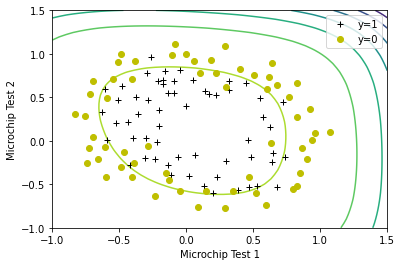

In [51]:
# 경계선을 그린다.
plotDecisionBoundary(theta, X_reg, y)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

plt.legend(('y=1', 'y=0', 'Decision boundary'), loc='upper right')

In [53]:
# training set에 대한 정확도(accuracy)를 계산한다.
p = predict(theta, X_reg)

# In Octave: Train Accuracy: 83.050847
print('Train Accuracy: ', np.mean(np.double(p == y)) * 100)

Train Accuracy:  83.05084745762711
